In [1]:
import pandas as pd 
import os 
import shutil
os.chdir('/Users/pooja/Desktop/ML Project')

In [2]:
filepath = '/Users/pooja/Desktop/ML Project/covid-chestxray-dataset/metadata.csv'
imagepath = '/Users/pooja/Desktop/ML Project/covid-chestxray-dataset/images'

In [4]:
dataFrame1 = pd.read_csv(filepath)
dataFrame1.shape

(950, 30)

In [5]:
dataFrame1.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [6]:
dataset_path = '/Users/pooja/Desktop/ML Project/Dataset/Covid Positive'

In [7]:
if not os.path.exists(dataset_path):
    os.mkdir(dataset_path)
    print('Folder created')

In [8]:
count = 0
for i,row in dataFrame1.iterrows():
    if row['finding'] == 'Pneumonia/Viral/COVID-19' and row['view'] == 'PA':
        filename = row['filename']
        image_path = os.path.join(imagepath,filename)
        image_path_copy = os.path.join(dataset_path,filename)
        shutil.copy2(image_path, image_path_copy)
        count +=1
        filename = ''
        image_path = ''


In [9]:
print('Positive Covid images in dataset are ', count)

Positive Covid images in dataset are  196


In [10]:
import random 
new_file_path = '/Users/pooja/Desktop/ML Project/chest_xray_datset/train/NORMAL'
new_dierectory_path = '/Users/pooja/Desktop/ML Project/Dataset/Covid Negative'

In [11]:
random.seed(10)
image_namelist = os.listdir(new_file_path)
len(image_namelist)

1341

In [12]:
count1 = 0 
for i in range(196):
    image_name = image_namelist[i]
    image_path = os.path.join(new_file_path, image_name)
    target_path = os.path.join(new_dierectory_path, image_name)
    shutil.copy2(image_path,target_path )
    count1 +=1

In [13]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [14]:
import os 
os.chdir('/Users/pooja/Desktop/ML Project')

In [15]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=2
EPOCHS=50

In [18]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Dataset",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 392 files belonging to 2 classes.


In [19]:
class_names = dataset.class_names
class_names

['Covid Negative', 'Covid Positive']

In [20]:
len(dataset) # totalImages/ batchsize

13

In [21]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0]


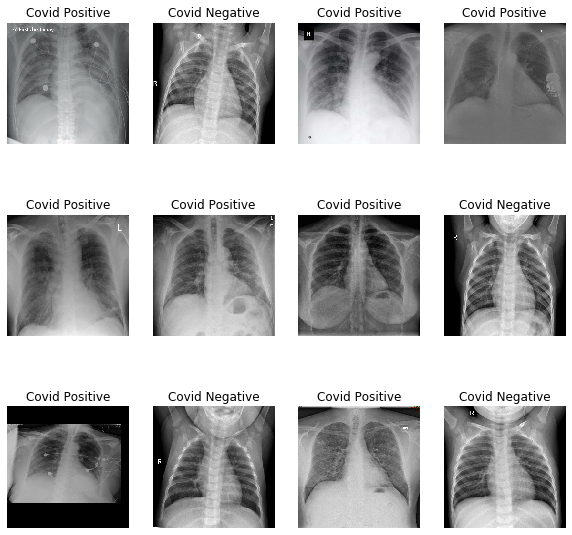

In [22]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [27]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [28]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
len(train_ds), len(val_ds), len(test_ds)

(10, 1, 2)

In [30]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [31]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [32]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [33]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

In [34]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 2


model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(n_classes, activation='sigmoid'),
])

model.build(input_shape=input_shape)

In [35]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (32, 252, 252, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (32, 126, 126, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (32, 126, 126, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (32, 124, 124, 64)        36928     
                                                      

In [36]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [37]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
10/10 [==============================] - 97s 9s/step - loss: 0.9347 - accuracy: 0.5169 - val_loss: 0.6944 - val_accuracy: 0.5000
Epoch 2/50
10/10 [==============================] - 69s 7s/step - loss: 0.6903 - accuracy: 0.5372 - val_loss: 0.6787 - val_accuracy: 0.8438
Epoch 3/50
10/10 [==============================] - 58s 6s/step - loss: 0.6878 - accuracy: 0.5507 - val_loss: 0.6752 - val_accuracy: 0.5312
Epoch 4/50
10/10 [==============================] - 56s 6s/step - loss: 0.6596 - accuracy: 0.5946 - val_loss: 0.6136 - val_accuracy: 0.9062
Epoch 5/50
10/10 [==============================] - 55s 6s/step - loss: 0.5872 - accuracy: 0.7264 - val_loss: 0.4483 - val_accuracy: 0.8438
Epoch 6/50
10/10 [==============================] - 56s 6s/step - loss: 0.5110 - accuracy: 0.8041 - val_loss: 0.3921 - val_accuracy: 0.8438
Epoch 7/50
10/10 [==============================] - 56s 5s/step - loss: 0.4354 - accuracy: 0.8649 - val_loss: 0.2978 - val_accuracy: 0.8438
Epoch 8/50
10/10 [==

In [38]:
scores = model.evaluate(test_ds)

2/2 [==============================] - 10s 2s/step - loss: 0.1547 - accuracy: 0.9531


In [39]:
scores

[0.1547311544418335, 0.953125]

In [40]:
history

In [41]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 10}

In [42]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Accuracy')

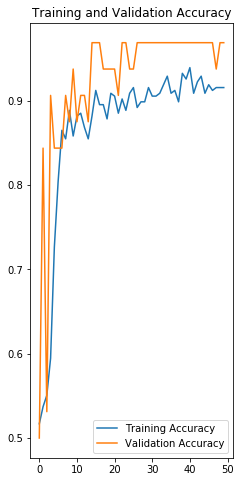

In [44]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

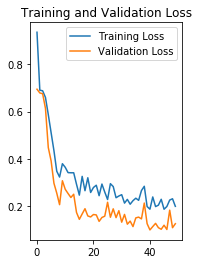

In [45]:
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Covid Positive
predicted label: Covid Positive


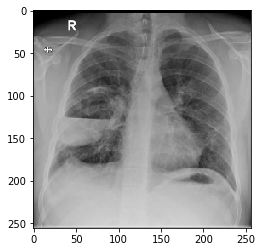

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

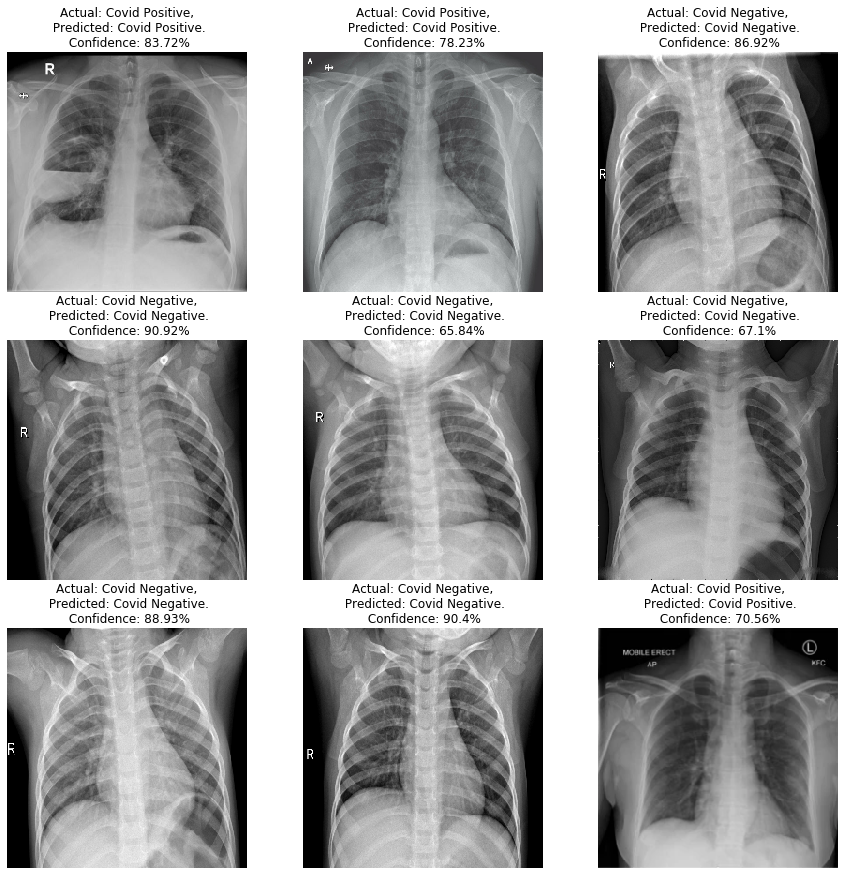

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
os.chdir("/Users/pooja/Desktop/ML Project/models")
model_version = 1 
model.save(f"../models/{model_version}")